CHICAGO CRIME PREDICTION USING MARKOV MODEL

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


Read the dataset

In [4]:
dataset=pd.read_csv("E:\\Crimes_-_2001_to_Present.csv")

In [5]:
dataset

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
1,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11449702,JB373031,07/31/2018 01:30:00 PM,009XX E HYDE PARK BLVD,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,...,5.0,41.0,18,NaN,NaN,2018,04/09/2019 04:24:58 PM,NaN,NaN,NaN
3,11643334,JC209972,12/19/2018 04:30:00 PM,056XX W WELLINGTON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,31.0,19.0,14,NaN,NaN,2018,04/04/2019 04:16:11 PM,NaN,NaN,NaN
4,11645527,JC212744,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,...,23.0,56.0,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7842932,13128007,JG325985,06/21/2023 08:00:00 PM,031XX N CALIFORNIA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,35.0,21.0,14,1157169.0,1920611.0,2023,07/15/2023 04:45:57 PM,41.937926,-87.697782,"(41.937925817, -87.697782474)"
7842933,13129172,JG327619,06/20/2023 04:00:00 AM,028XX N MAPLEWOOD AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,True,...,35.0,21.0,08B,1158868.0,1918755.0,2023,07/15/2023 04:45:57 PM,41.932798,-87.691589,"(41.932798095, -87.691589364)"
7842934,13128066,JG325838,06/06/2023 03:42:00 PM,018XX N LOCKWOOD AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,False,...,37.0,25.0,17,1140792.0,1911954.0,2023,07/15/2023 04:45:57 PM,41.914487,-87.758185,"(41.914487492, -87.758185241)"
7842935,13128324,JG326502,05/13/2023 12:00:00 PM,020XX W CERMAK RD,1120,DECEPTIVE PRACTICE,FORGERY,CURRENCY EXCHANGE,False,False,...,25.0,31.0,10,1163211.0,1889404.0,2023,07/15/2023 04:45:57 PM,41.852166,-87.676455,"(41.85216632, -87.676455032)"


In [6]:
dataset.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
1,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11449702,JB373031,07/31/2018 01:30:00 PM,009XX E HYDE PARK BLVD,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,...,5.0,41.0,18,NaN,NaN,2018,04/09/2019 04:24:58 PM,NaN,NaN,NaN
3,11643334,JC209972,12/19/2018 04:30:00 PM,056XX W WELLINGTON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,31.0,19.0,14,NaN,NaN,2018,04/04/2019 04:16:11 PM,NaN,NaN,NaN
4,11645527,JC212744,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,...,23.0,56.0,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7842937 entries, 0 to 7842936
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [8]:
dataset.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,7.842937e+06,7.842937e+06,7.842890e+06,7.228088e+06,7.229461e+06,7.754915e+06,7.754915e+06,7.842937e+06,7.754915e+06,7.754915e+06
mean,7.071242e+06,1.185692e+03,1.129491e+01,2.275678e+01,3.747550e+01,1.164606e+06,1.885793e+06,2.010041e+03,4.184221e+01,-8.767148e+01
std,3.528350e+06,7.032076e+02,6.953709e+00,1.385103e+01,2.154170e+01,1.684307e+04,3.227163e+04,6.336775e+00,8.878555e-02,6.107159e-02
min,6.340000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01
25%,3.814349e+06,6.210000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152984e+06,1.859078e+06,2.005000e+03,4.176873e+01,-8.771366e+01
50%,7.072857e+06,1.034000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166120e+06,1.890736e+06,2.009000e+03,4.185593e+01,-8.766582e+01
75%,1.020682e+07,1.731000e+03,1.700000e+01,3.400000e+01,5.700000e+01,1.176383e+06,1.909281e+06,2.015000e+03,4.190680e+01,-8.762818e+01
max,1.314245e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951622e+06,2.023000e+03,4.202291e+01,-8.752453e+01


In [9]:
dataset.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

Drop Duplicate Values

In [10]:
dataset.drop_duplicates(inplace=True)


In [11]:
dataset.dropna(inplace=True,axis=0)

Drop Missing Values

In [12]:
missing_values = dataset.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64


# Convert the 'Date' column to a datetime object with the correct format


In [13]:
dataset['Date'] = pd.to_datetime(dataset['Date'], format='%m/%d/%Y %I:%M:%S %p')


# Extract date components (year, month, day, hour, etc.)


In [14]:
dataset['Year'] = dataset['Date'].dt.year
dataset['Month'] = dataset['Date'].dt.month
dataset['Day'] = dataset['Date'].dt.day
dataset['Hour'] = dataset['Date'].dt.hour

In [15]:
dataset.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Hour
6,10224881,HY411873,2015-09-03 18:00:00,044XX S UNIVERSITY AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,1184667.0,1875669.0,2015,02/10/2018 03:50:01 PM,41.813999,-87.598138,"(41.81399924, -87.598137918)",9,3,18
11,10225155,HY412177,2015-09-05 22:42:00,007XX W IRVING PARK RD,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,True,False,...,1170563.0,1926785.0,2015,02/10/2018 03:50:01 PM,41.954584,-87.648376,"(41.954584472, -87.648375776)",9,5,22
15,10225206,HY412253,2015-09-06 01:10:00,047XX S STATE ST,041A,BATTERY,AGGRAVATED: HANDGUN,VACANT LOT/LAND,False,False,...,1177070.0,1873609.0,2015,02/10/2018 03:50:01 PM,41.808521,-87.626066,"(41.80852139, -87.62606631)",9,6,1
17,10225234,HY412306,2015-09-06 02:00:00,002XX N ST LOUIS AVE,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,False,False,...,1153006.0,1901570.0,2015,02/10/2018 03:50:01 PM,41.885759,-87.713588,"(41.885759278, -87.713588042)",9,6,2
23,10225308,HY412341,2015-09-06 02:35:00,013XX W ADDISON ST,2230,LIQUOR LAW VIOLATION,ILLEGAL CONSUMPTION BY MINOR,SIDEWALK,True,False,...,1166847.0,1924028.0,2015,09/17/2015 11:37:18 AM,41.947100,-87.662116,"(41.947099832, -87.662115668)",9,6,2


Save the cleaned dataset as a new dataset

In [16]:
dataset.to_csv('cleaned_chicago_crime_dataset.csv', index=False)
# # 

In [17]:
dataset.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Hour
6,10224881,HY411873,2015-09-03 18:00:00,044XX S UNIVERSITY AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,1184667.0,1875669.0,2015,02/10/2018 03:50:01 PM,41.813999,-87.598138,"(41.81399924, -87.598137918)",9,3,18
11,10225155,HY412177,2015-09-05 22:42:00,007XX W IRVING PARK RD,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,True,False,...,1170563.0,1926785.0,2015,02/10/2018 03:50:01 PM,41.954584,-87.648376,"(41.954584472, -87.648375776)",9,5,22
15,10225206,HY412253,2015-09-06 01:10:00,047XX S STATE ST,041A,BATTERY,AGGRAVATED: HANDGUN,VACANT LOT/LAND,False,False,...,1177070.0,1873609.0,2015,02/10/2018 03:50:01 PM,41.808521,-87.626066,"(41.80852139, -87.62606631)",9,6,1
17,10225234,HY412306,2015-09-06 02:00:00,002XX N ST LOUIS AVE,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,False,False,...,1153006.0,1901570.0,2015,02/10/2018 03:50:01 PM,41.885759,-87.713588,"(41.885759278, -87.713588042)",9,6,2
23,10225308,HY412341,2015-09-06 02:35:00,013XX W ADDISON ST,2230,LIQUOR LAW VIOLATION,ILLEGAL CONSUMPTION BY MINOR,SIDEWALK,True,False,...,1166847.0,1924028.0,2015,09/17/2015 11:37:18 AM,41.947100,-87.662116,"(41.947099832, -87.662115668)",9,6,2


# Total number of crimes per year


In [18]:
crime_count_by_year = dataset['Year'].value_counts().sort_index()



Text(0, 0.5, 'Number of Crimes')

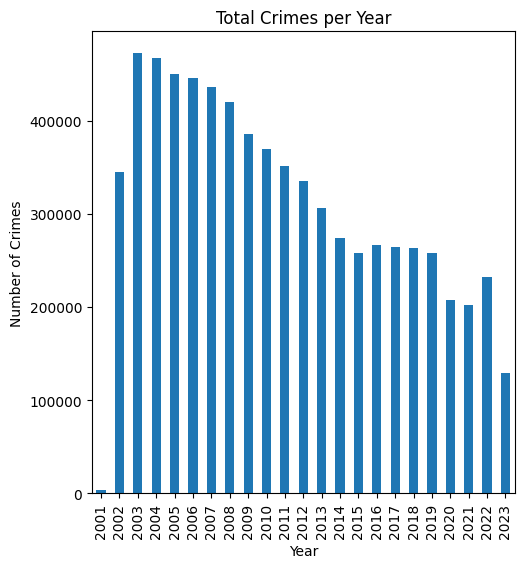

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
crime_count_by_year.plot(kind='bar', title='Total Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')


# Total number of arrests


In [20]:
arrest_count = dataset['Arrest'].value_counts()



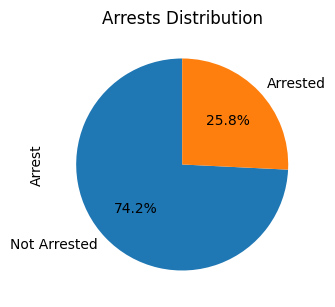

In [21]:
plt.subplot(1, 2, 2)
arrest_count.plot(kind='pie', autopct='%1.1f%%', labels=['Not Arrested', 'Arrested'], startangle=90)
plt.title('Arrests Distribution')

plt.tight_layout()
plt.show()


# Crime types with the highest occurrences


In [22]:
top_crime_types = dataset['Primary Type'].value_counts().head(10)




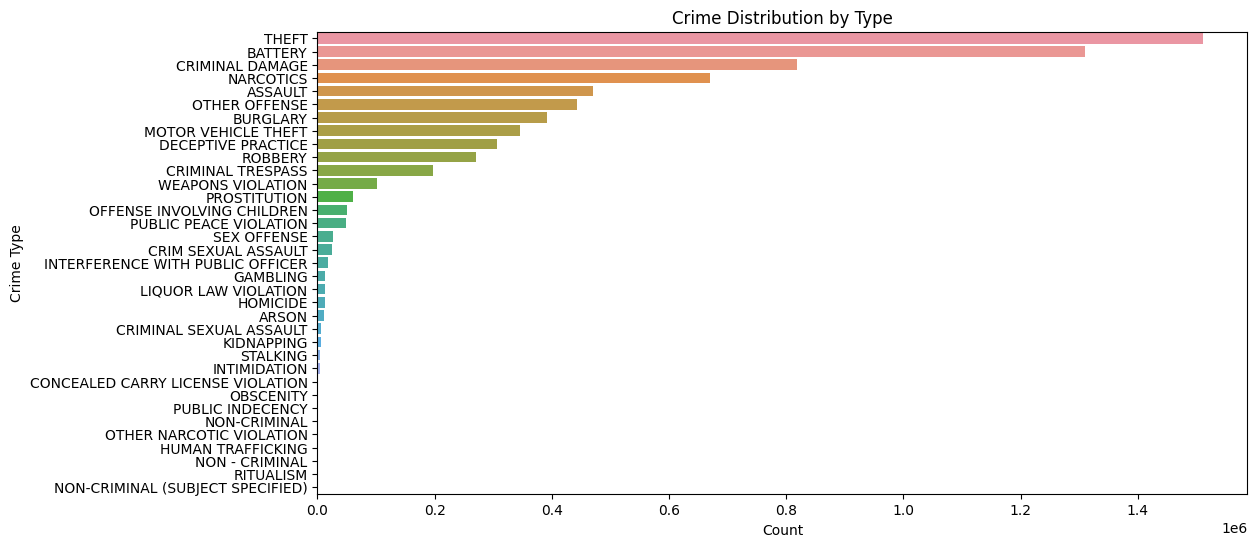

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, y='Primary Type', order=dataset['Primary Type'].value_counts().index)
plt.title('Crime Distribution by Type')
plt.xlabel('Count')
plt.ylabel('Crime Type')
plt.show()


#  Crime distribution by location


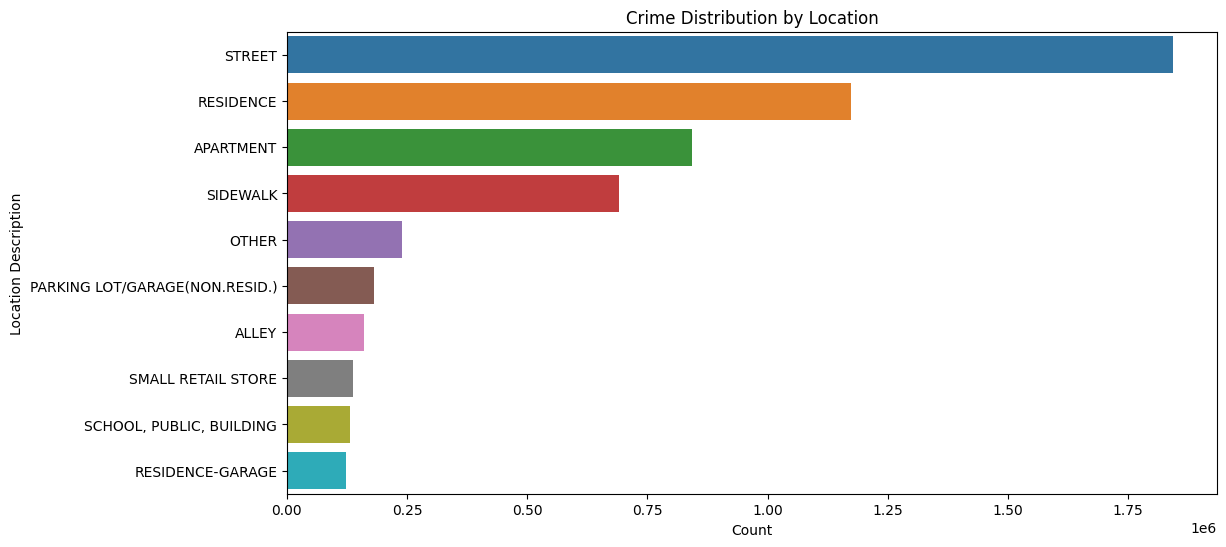

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, y='Location Description', order=dataset['Location Description'].value_counts().index[:10])
plt.title('Crime Distribution by Location')
plt.xlabel('Count')
plt.ylabel('Location Description')
plt.show()


Crime Heat Map

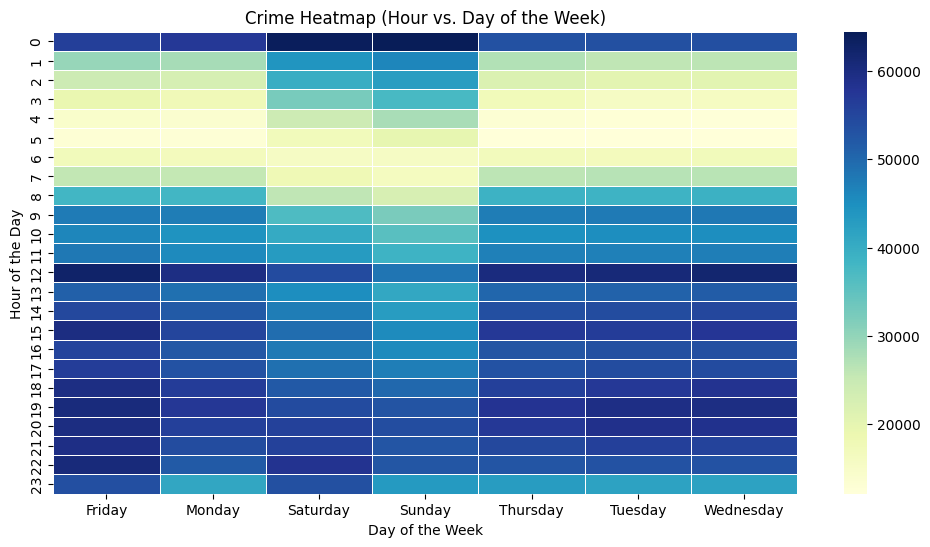

In [25]:
import seaborn as sns
dataset['Hour'] = dataset['Date'].dt.hour
dataset['DayOfWeek'] = dataset['Date'].dt.day_name()

pivot_table = dataset.pivot_table(index='Hour', columns='DayOfWeek', values='ID', aggfunc='count')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=0.5)
plt.title('Crime Heatmap (Hour vs. Day of the Week)')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()

Predict the type of Future crime using The markov chain model

# Create a dictionary to map crime types to numerical labels


In [26]:
crime_types = dataset['Primary Type'].unique()
crime_type_to_label = {crime_type: label for label, crime_type in enumerate(crime_types)}

# Create a transition matrix for the Markov model


In [27]:
num_classes = len(crime_types)
transition_matrix = np.zeros((num_classes, num_classes))

# Convert dates to months 


In [28]:

dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Month'] = dataset['Date'].dt.month

# Iterate through the data to populate the transition matrix


In [29]:
dataset

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Hour,DayOfWeek
6,10224881,HY411873,2015-09-03 18:00:00,044XX S UNIVERSITY AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,1875669.0,2015,02/10/2018 03:50:01 PM,41.813999,-87.598138,"(41.81399924, -87.598137918)",9,3,18,Thursday
11,10225155,HY412177,2015-09-05 22:42:00,007XX W IRVING PARK RD,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,True,False,...,1926785.0,2015,02/10/2018 03:50:01 PM,41.954584,-87.648376,"(41.954584472, -87.648375776)",9,5,22,Saturday
15,10225206,HY412253,2015-09-06 01:10:00,047XX S STATE ST,041A,BATTERY,AGGRAVATED: HANDGUN,VACANT LOT/LAND,False,False,...,1873609.0,2015,02/10/2018 03:50:01 PM,41.808521,-87.626066,"(41.80852139, -87.62606631)",9,6,1,Sunday
17,10225234,HY412306,2015-09-06 02:00:00,002XX N ST LOUIS AVE,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,False,False,...,1901570.0,2015,02/10/2018 03:50:01 PM,41.885759,-87.713588,"(41.885759278, -87.713588042)",9,6,2,Sunday
23,10225308,HY412341,2015-09-06 02:35:00,013XX W ADDISON ST,2230,LIQUOR LAW VIOLATION,ILLEGAL CONSUMPTION BY MINOR,SIDEWALK,True,False,...,1924028.0,2015,09/17/2015 11:37:18 AM,41.947100,-87.662116,"(41.947099832, -87.662115668)",9,6,2,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7842932,13128007,JG325985,2023-06-21 20:00:00,031XX N CALIFORNIA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,1920611.0,2023,07/15/2023 04:45:57 PM,41.937926,-87.697782,"(41.937925817, -87.697782474)",6,21,20,Wednesday
7842933,13129172,JG327619,2023-06-20 04:00:00,028XX N MAPLEWOOD AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,True,...,1918755.0,2023,07/15/2023 04:45:57 PM,41.932798,-87.691589,"(41.932798095, -87.691589364)",6,20,4,Tuesday
7842934,13128066,JG325838,2023-06-06 15:42:00,018XX N LOCKWOOD AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,False,...,1911954.0,2023,07/15/2023 04:45:57 PM,41.914487,-87.758185,"(41.914487492, -87.758185241)",6,6,15,Tuesday
7842935,13128324,JG326502,2023-05-13 12:00:00,020XX W CERMAK RD,1120,DECEPTIVE PRACTICE,FORGERY,CURRENCY EXCHANGE,False,False,...,1889404.0,2023,07/15/2023 04:45:57 PM,41.852166,-87.676455,"(41.85216632, -87.676455032)",5,13,12,Saturday


In [32]:
for i in range(len(dataset) - 1):
    current_type = dataset.iloc[i]['Primary Type']
    next_type = dataset.iloc[i + 1]['Primary Type']
    
    current_label = crime_type_to_label[current_type]
    next_label = crime_type_to_label[next_type]
    
    transition_matrix[current_label][next_label] += 1

# Normalize the transition matrix to obtain transition probabilities


In [33]:

row_sums = transition_matrix.sum(axis=1)
transition_matrix = transition_matrix / row_sums[:, np.newaxis]


# Function to predict the next crime type using the Markov model


In [34]:

def predict_next_crime(current_crime_type):
    current_label = crime_type_to_label[current_crime_type]
    next_label = np.random.choice(num_classes, p=transition_matrix[current_label])
    next_crime_type = crime_types[next_label]
    return next_crime_type


# Example usage


In [35]:
initial_crime_type = 'THEFT'
predicted_sequence = [initial_crime_type]

In [36]:

for _ in range(10):  
    next_crime_type = predict_next_crime(initial_crime_type)
    predicted_sequence.append(next_crime_type)
    initial_crime_type = next_crime_type

In [37]:


print("Predicted Crime Sequence:", predicted_sequence)


Predicted Crime Sequence: ['THEFT', 'CRIMINAL DAMAGE', 'OTHER OFFENSE', 'NARCOTICS', 'OTHER OFFENSE', 'THEFT', 'ASSAULT', 'ASSAULT', 'BATTERY', 'CRIMINAL DAMAGE', 'CRIMINAL DAMAGE']
